In [1]:
import os
import pandas as pd
import ROOT as r
from datetime import datetime, timedelta, timezone
import pytz
import matplotlib.pyplot as plt
import math
import sys
from omsapi import OMSAPI
from scipy.integrate import simps


Welcome to JupyROOT 6.24/07


In [2]:
my_app_id='milliqan-oms'
my_app_secret='AvwJaQWfSMuDsOhYwPxynQMrFN7YXfPV'

omsapi = OMSAPI("https://cmsoms.cern.ch/agg/api", "v1", cert_verify=False)
omsapi.auth_oidc(my_app_id,my_app_secret)

In [169]:
q = omsapi.query("lumisummaries")
q.paginate(per_page=10000, page=1)

#2024-06-02T06:17:53.000Z 2024-06-02T06:25:08.000Z
#2024-06-02T11:45:47.000Z	2024-06-02T11:53:02.000Z
#2024-06-02T11:53:02.000Z	2024-06-02T12:00:35.000Z
#2024-06-02T12:00:36.000Z end time 2024-06-02T12:08:01.000Z
#2024-06-02 11:45:47+00:00	2024-06-02 11:53:02+00:00

start = '2024-06-02T11:45:47Z'
stop = '2024-06-02T11:53:02Z'

q.filter('end_time', start, 'GE')
q.filter('end_time', stop, 'LE')
#q.sort("start_time")
q.custom('group[count]', 100)
#q.attrs(cols)

response = q.data()

dataframe = [x['attributes'] for x in response.json()['data']]
dataframe = pd.DataFrame(dataframe)
dataframe

https://cmsoms.cern.ch/agg/api/v1/lumisummaries?filter[end_time][GE]=2024-06-02T11:45:47Z&filter[end_time][LE]=2024-06-02T11:53:02Z&page[offset]=0&page[limit]=10000&group[count]=100


,max_pileup,last_fill_number,last_lumisection,number_lumisections,end_time,first_lumisection,start_time,first_run_number,max_init_lumi,efficiency_lumi,delivered_lumi,recorded_lumi,last_run_number,runtime_type,first_fill_number,runtime_type_id
0,41.553586,9700,24,1,2024-06-02T11:49:16Z,24,2024-06-02T11:48:53Z,381477,13.668395,97.485087,0.318624,0.310611,381477,PROTONS,9700,1
1,28.034465,9700,25,1,2024-06-02T11:49:39Z,25,2024-06-02T11:49:16Z,381477,9.221494,97.923219,0.533586,0.521109,381477,PROTONS,9700,1
2,0.734044,9700,26,1,2024-06-02T11:50:03Z,26,2024-06-02T11:49:39Z,381477,0.241452,42.565512,0.539215,0.523505,381477,PROTONS,9700,1
3,2.998661,9700,27,1,2024-06-02T11:50:26Z,27,2024-06-02T11:50:03Z,381477,0.986362,49.076131,0.562208,0.534789,381477,PROTONS,9700,1
4,10.778793,9700,28,1,2024-06-02T11:50:49Z,28,2024-06-02T11:50:26Z,381477,3.545514,98.426737,0.644857,0.616138,381477,PROTONS,9700,1
5,24.146773,9700,29,1,2024-06-02T11:51:13Z,29,2024-06-02T11:50:49Z,381477,7.942699,97.827887,0.830010,0.797269,381477,PROTONS,9700,1
6,38.934922,9700,30,1,2024-06-02T11:51:36Z,30,2024-06-02T11:51:13Z,381477,12.807027,97.003667,1.128554,1.086868,381477,PROTONS,9700,1
7,38.391354,9700,31,1,2024-06-02T11:51:59Z,31,2024-06-02T11:51:36Z,381477,12.628229,97.359921,1.422931,1.373473,381477,PROTONS,9700,1
8,23.942576,9700,32,1,2024-06-02T11:52:23Z,32,2024-06-02T11:51:59Z,381477,7.875532,79.549029,1.606518,1.519514,381477,PROTONS,9700,1
9,10.849891,9700,33,1,2024-06-02T11:52:46Z,33,2024-06-02T11:52:23Z,381477,3.568900,93.832380,1.689712,1.597578,381477,PROTONS,9700,1


In [139]:
def getMQFileLumis(q, start_time, end_time, cols = ['start_time', 'end_time', 'delivered_lumi']):
    q = omsapi.query("lumisummaries")
    q.paginate(per_page=10000, page=1)
    q.filter('start_time', start_time, 'GE')
    q.filter('start_time', end_time, 'LE')
    q.attrs(cols)
    response = q.data()
    if len(response.json()['data']) == 0:
        dataframe = [{'start_time': start_time, 'end_time': end_time, 'delivered_lumi': 0}]
    else:
        dataframe = [x['attributes'] for x in response.json()['data']]
    return dataframe


In [218]:
dataframe

,max_pileup,last_fill_number,last_lumisection,number_lumisections,end_time,first_lumisection,start_time,first_run_number,max_init_lumi,efficiency_lumi,delivered_lumi,recorded_lumi,last_run_number,runtime_type,first_fill_number,runtime_type_id
0,40.462496,9694,1691,87,2024-06-01T00:34:09Z,1605,2024-06-01T00:00:21Z,381417,13.309498,95.118047,26.441764,25.142208,381417,PROTONS,9694,1
1,38.791121,9694,1778,87,2024-06-01T01:07:57Z,1692,2024-06-01T00:34:09Z,381417,12.759726,97.132254,51.739556,49.714360,381417,PROTONS,9694,1
2,39.866350,9696,69,87,2024-06-01T12:30:36Z,1779,2024-06-01T01:07:57Z,381417,13.113406,95.206747,72.141754,69.429933,381443,PROTONS,9694,1
3,60.907081,9696,156,87,2024-06-01T13:04:24Z,70,2024-06-01T12:30:36Z,381443,20.034422,92.947924,109.627682,104.253477,381443,PROTONS,9696,1
4,62.257753,9696,243,87,2024-06-01T13:38:13Z,157,2024-06-01T13:04:24Z,381443,20.478703,94.117918,149.820449,142.076629,381443,PROTONS,9696,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52.120360,9708,580,86,2024-06-04T21:54:33Z,495,2024-06-04T21:21:08Z,381544,17.144168,95.913448,3304.795153,3066.333616,381544,PROTONS,9708,1
96,49.742678,9708,666,86,2024-06-04T22:27:58Z,581,2024-06-04T21:54:33Z,381544,16.362067,96.336948,3336.850642,3097.214637,381544,PROTONS,9708,1
97,47.654310,9708,752,86,2024-06-04T23:01:22Z,667,2024-06-04T22:27:58Z,381544,15.675132,94.533006,3367.571377,3126.257676,381544,PROTONS,9708,1
98,45.669268,9708,838,86,2024-06-04T23:34:47Z,753,2024-06-04T23:01:22Z,381544,15.022183,94.199232,3396.968994,3153.952037,381544,PROTONS,9708,1


Text(0, 0.5, 'Integrated Luminosity (pb^-1)')

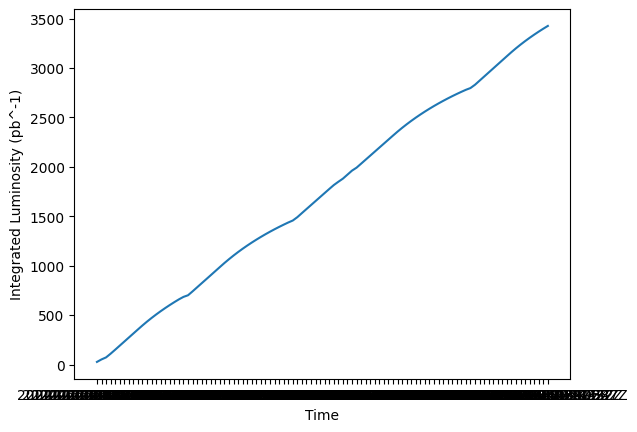

In [219]:
plt.plot(dataframe['start_time'], dataframe['delivered_lumi'])
plt.xlabel('Time')
plt.ylabel('Integrated Luminosity (pb^-1)')

In [20]:
lumis = pd.read_json('mqLumis.json', orient = 'split', compression = 'infer')
lumis

,run,file,lumis,fill,beam,beamInFill,dir,filename,start,stop,beamType,beamEnergy,betaStar,fillStart,fillEnd,startStableBeam,endStableBeam,lumiEst
0,1000,1,235.12358,8858,1.0,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.1_default.root,2023-06-01T15:42:47.000Z,2023-06-01T15:43:14.000Z,PROTONS,6799.56,120.0,2023-06-01T11:12:18.000Z,2023-06-01T19:10:57.000Z,2023-06-01T13:07:00.000Z,2023-06-01T19:05:29.000Z,0.295148
1,1000,2,235.12358,8858,1.0,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.2_default.root,2023-06-01T17:43:14.000Z,2023-06-01T17:43:42.000Z,PROTONS,6799.56,120.0,2023-06-01T11:12:18.000Z,2023-06-01T19:10:57.000Z,2023-06-01T13:07:00.000Z,2023-06-01T19:05:29.000Z,0.306079
2,1000,3,235.12358,8858,1.0,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.3_default.root,2023-06-01T17:43:42.000Z,2023-06-01T17:44:06.000Z,PROTONS,6799.56,120.0,2023-06-01T11:12:18.000Z,2023-06-01T19:10:57.000Z,2023-06-01T13:07:00.000Z,2023-06-01T19:05:29.000Z,0.262354
3,1000,4,235.12358,8858,1.0,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.4_default.root,2023-06-01T17:44:08.000Z,2023-06-01T17:44:32.000Z,PROTONS,6799.56,120.0,2023-06-01T11:12:18.000Z,2023-06-01T19:10:57.000Z,2023-06-01T13:07:00.000Z,2023-06-01T19:05:29.000Z,0.262354
4,1000,5,235.12358,8858,1.0,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.5_default.root,2023-06-01T17:44:33.000Z,2023-06-01T17:44:57.000Z,PROTONS,6799.56,120.0,2023-06-01T11:12:18.000Z,2023-06-01T19:10:57.000Z,2023-06-01T13:07:00.000Z,2023-06-01T19:05:29.000Z,0.262354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70600,1608,37,0,None,0.0,False,/store/user/milliqan/run3/bar//1600/0000,MilliQan_Run1608.37_default.root,2024-06-04T17:13:56.000Z,2024-06-04T17:21:35.000Z,None,None,None,None,None,None,None,0.000000
70601,1608,38,0,None,0.0,False,/store/user/milliqan/run3/bar//1600/0000,MilliQan_Run1608.38_default.root,2024-06-04T17:21:35.000Z,2024-06-04T17:29:20.000Z,None,None,None,None,None,None,None,0.000000
70602,1608,39,0,None,0.0,False,/store/user/milliqan/run3/bar//1600/0000,MilliQan_Run1608.39_default.root,2024-06-04T17:29:20.000Z,2024-06-04T17:36:32.000Z,None,None,None,None,None,None,None,0.000000
70604,1608,40,0,None,0.0,False,/store/user/milliqan/run3/bar//1600/0000,MilliQan_Run1608.40_default.root,2024-06-04T17:36:32.000Z,2024-06-04T17:44:26.000Z,None,None,None,None,None,None,None,0.000000


In [210]:
test = lumis[(lumis['run']==1576)].copy()
test.reset_index(inplace=True)
test

,index,run,file,lumis,fill,beam,beamInFill,dir,filename,start,stop,beamType,beamEnergy,betaStar,fillStart,fillEnd,startStableBeam,endStableBeam,lumiEst
0,64153,1576,1,718.269257,9594,1.0,True,/store/user/milliqan/run3/bar//1500/0007,MilliQan_Run1576.1_default.root,2024-05-04T13:35:47.000Z,2024-05-04T13:42:52.000Z,PROTONS,6799.32,120.0,2024-05-04T03:35:41.000Z,2024-05-04T19:45:19.000Z,2024-05-04T06:55:14.000Z,2024-05-04T19:32:29.000Z,6.718707
1,64154,1576,2,718.269257,9594,1.0,True,/store/user/milliqan/run3/bar//1500/0007,MilliQan_Run1576.2_default.root,2024-05-04T13:42:52.000Z,2024-05-04T13:49:40.000Z,PROTONS,6799.32,120.0,2024-05-04T03:35:41.000Z,2024-05-04T19:45:19.000Z,2024-05-04T06:55:14.000Z,2024-05-04T19:32:29.000Z,6.449958
2,64155,1576,3,718.269257,9594,1.0,True,/store/user/milliqan/run3/bar//1500/0007,MilliQan_Run1576.3_default.root,2024-05-04T13:49:41.000Z,2024-05-04T13:56:11.000Z,PROTONS,6799.32,120.0,2024-05-04T03:35:41.000Z,2024-05-04T19:45:19.000Z,2024-05-04T06:55:14.000Z,2024-05-04T19:32:29.000Z,6.165401
3,64156,1576,4,718.269257,9594,1.0,True,/store/user/milliqan/run3/bar//1500/0007,MilliQan_Run1576.4_default.root,2024-05-04T13:56:11.000Z,2024-05-04T14:02:48.000Z,PROTONS,6799.32,120.0,2024-05-04T03:35:41.000Z,2024-05-04T19:45:19.000Z,2024-05-04T06:55:14.000Z,2024-05-04T19:32:29.000Z,6.276062
4,64157,1576,5,718.269257,9594,1.0,True,/store/user/milliqan/run3/bar//1500/0007,MilliQan_Run1576.5_default.root,2024-05-04T14:02:48.000Z,2024-05-04T14:09:44.000Z,PROTONS,6799.32,120.0,2024-05-04T03:35:41.000Z,2024-05-04T19:45:19.000Z,2024-05-04T06:55:14.000Z,2024-05-04T19:32:29.000Z,6.576428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,64356,1576,204,764.005745,9603,1.0,True,/store/user/milliqan/run3/bar//1500/0007,MilliQan_Run1576.204_default.root,2024-05-05T13:29:45.000Z,2024-05-05T13:37:21.000Z,PROTONS,6799.32,120.0,2024-05-05T03:37:59.000Z,2024-05-05T20:12:43.000Z,2024-05-05T06:56:44.000Z,2024-05-05T20:00:49.000Z,7.405391
204,64357,1576,205,764.005745,9603,1.0,True,/store/user/milliqan/run3/bar//1500/0007,MilliQan_Run1576.205_default.root,2024-05-05T13:37:21.000Z,2024-05-05T13:44:39.000Z,PROTONS,6799.32,120.0,2024-05-05T03:37:59.000Z,2024-05-05T20:12:43.000Z,2024-05-05T06:56:44.000Z,2024-05-05T20:00:49.000Z,7.113073
205,64358,1576,206,764.005745,9603,1.0,True,/store/user/milliqan/run3/bar//1500/0007,MilliQan_Run1576.206_default.root,2024-05-05T13:44:40.000Z,2024-05-05T13:51:51.000Z,PROTONS,6799.32,120.0,2024-05-05T03:37:59.000Z,2024-05-05T20:12:43.000Z,2024-05-05T06:56:44.000Z,2024-05-05T20:00:49.000Z,6.999394
206,64359,1576,207,764.005745,9603,1.0,True,/store/user/milliqan/run3/bar//1500/0007,MilliQan_Run1576.207_default.root,2024-05-05T13:51:51.000Z,2024-05-05T13:58:45.000Z,PROTONS,6799.32,120.0,2024-05-05T03:37:59.000Z,2024-05-05T20:12:43.000Z,2024-05-05T06:56:44.000Z,2024-05-05T20:00:49.000Z,6.723316


In [211]:
q = omsapi.query("lumisummaries")
q.paginate(per_page=10000, page=1)

lumiInfo = []

for i, (index, x) in enumerate(test.iterrows()):
    #if i <2: continue
    #if i > 10: break
    #print(x['start'], x['stop'], x['lumiEst'])
    if i%20 == 0: print("Working on file", i)
    out = getMQFileLumis(q, x['start'], x['stop'])
    lumiInfo.append(out[0])


Unauthorized. Will try to obtain a new token
Working on file 0
https://cmsoms.cern.ch/agg/api/v1/lumisummaries?fields=delivered_lumi,end_time,start_time&filter[start_time][GE]=2024-05-04T13:35:47.000Z&filter[start_time][LE]=2024-05-04T13:42:52.000Z&page[offset]=0&page[limit]=10000
https://cmsoms.cern.ch/agg/api/v1/lumisummaries?fields=delivered_lumi,end_time,start_time&filter[start_time][GE]=2024-05-04T13:42:52.000Z&filter[start_time][LE]=2024-05-04T13:49:40.000Z&page[offset]=0&page[limit]=10000
https://cmsoms.cern.ch/agg/api/v1/lumisummaries?fields=delivered_lumi,end_time,start_time&filter[start_time][GE]=2024-05-04T13:49:41.000Z&filter[start_time][LE]=2024-05-04T13:56:11.000Z&page[offset]=0&page[limit]=10000
https://cmsoms.cern.ch/agg/api/v1/lumisummaries?fields=delivered_lumi,end_time,start_time&filter[start_time][GE]=2024-05-04T13:56:11.000Z&filter[start_time][LE]=2024-05-04T14:02:48.000Z&page[offset]=0&page[limit]=10000
https://cmsoms.cern.ch/agg/api/v1/lumisummaries?fields=delive

,lumiEst,start,stop,start_time,end_time,delivered_lumi,start_diff,stop_diff,error,errorRatio
0,6.718707,2024-05-04 13:35:47+00:00,2024-05-04 13:42:52+00:00,2024-05-04 13:36:02+00:00,2024-05-04 13:43:02+00:00,6.539940,-15,-10,0.178766,0.026607
1,6.449958,2024-05-04 13:42:52+00:00,2024-05-04 13:49:40+00:00,2024-05-04 13:43:02+00:00,2024-05-04 13:50:01+00:00,6.485859,-10,-21,-0.035901,-0.005566
2,6.165401,2024-05-04 13:49:41+00:00,2024-05-04 13:56:11+00:00,2024-05-04 13:50:01+00:00,2024-05-04 13:56:14+00:00,5.708248,-20,-3,0.457153,0.074148
3,6.276062,2024-05-04 13:56:11+00:00,2024-05-04 14:02:48+00:00,2024-05-04 13:56:14+00:00,2024-05-04 14:02:51+00:00,6.009207,-3,-3,0.266855,0.042519
4,6.576428,2024-05-04 14:02:48+00:00,2024-05-04 14:09:44+00:00,2024-05-04 14:02:51+00:00,2024-05-04 14:09:50+00:00,6.303734,-3,-6,0.272694,0.041465
...,...,...,...,...,...,...,...,...,...,...
203,7.405391,2024-05-05 13:29:45+00:00,2024-05-05 13:37:21+00:00,2024-05-05 13:30:07+00:00,2024-05-05 13:37:30+00:00,7.377342,-22,-9,0.028049,0.003788
204,7.113073,2024-05-05 13:37:21+00:00,2024-05-05 13:44:39+00:00,2024-05-05 13:37:30+00:00,2024-05-05 13:44:53+00:00,7.284156,-9,-14,-0.171083,-0.024052
205,6.999394,2024-05-05 13:44:40+00:00,2024-05-05 13:51:51+00:00,2024-05-05 13:44:53+00:00,2024-05-05 13:51:52+00:00,6.843289,-13,-1,0.156105,0.022303
206,6.723316,2024-05-05 13:51:51+00:00,2024-05-05 13:58:45+00:00,2024-05-05 13:51:52+00:00,2024-05-05 13:58:52+00:00,6.771585,-1,-7,-0.048270,-0.007179


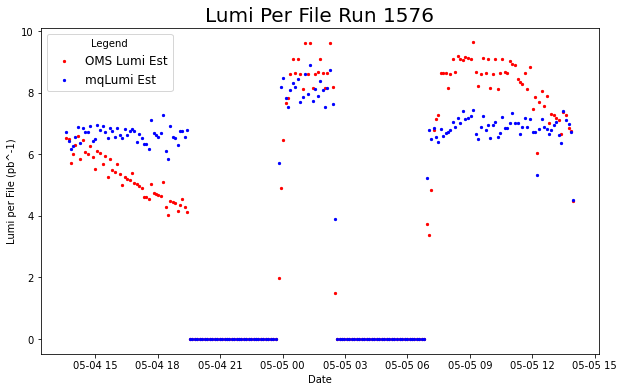

In [221]:
#compare file luminosities

run = test['run'].iloc[0]

omsLumi = pd.DataFrame(lumiInfo, columns=['start_time', 'end_time', 'delivered_lumi'])

new = pd.concat([test[['lumiEst', 'start', 'stop']], omsLumi], axis=1)

#test['start'] = pd.to_datetime(test['start'])
new['start_time'] = pd.to_datetime(new['start_time'])
new['end_time'] = pd.to_datetime(new['end_time'])
new['start'] = pd.to_datetime(new['start'])
new['stop'] = pd.to_datetime(new['stop'])

new['start_diff'] = (new['start'].view('int64') - new['start_time'].view('int64')) // 10**9
new['stop_diff'] = (new['stop'].view('int64') - new['end_time'].view('int64')) // 10**9

new['error'] = new['lumiEst'] - new['delivered_lumi']
new['errorRatio'] = new['error'] / new['lumiEst']


plt.figure(figsize=(10, 6))
plt.scatter(new['start_time'], new['delivered_lumi'], marker='o', linestyle='-', color='red', s=5)
plt.scatter(new['start_time'], new['lumiEst'], marker='o', linestyle='-', color='blue', s=5)

plt.xlabel('Date')
plt.ylabel('Lumi per File (pb^-1)')
plt.title('Lumi Per File Run {}'.format(run), fontsize=20)

plt.legend(loc='upper left', labels=['OMS Lumi Est', 'mqLumi Est'], title='Legend', fontsize=12)


new[new['lumiEst'] > 0]

Text(0.35, 0.9, 'Total Difference -0.006516682842999444 $pb^{-1}$')

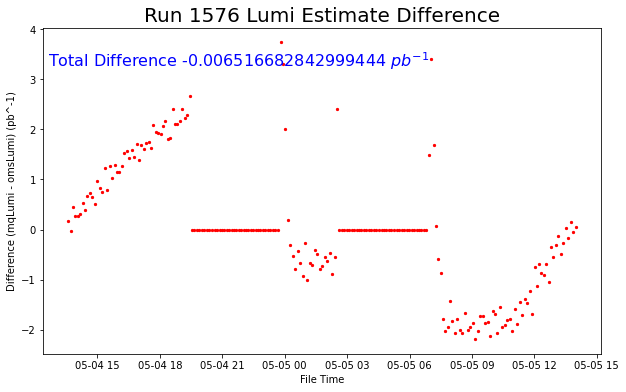

In [222]:
#difference between omsapi and flat estimate
plt.figure(figsize=(10, 6))
plt.scatter(new['start_time'], new['error'], marker='o', linestyle='-', color='red', s=5)

plt.xlabel('File Time')
plt.ylabel('Difference (mqLumi - omsLumi) (pb^-1)')
plt.title("Run {} Lumi Estimate Difference".format(run), fontsize=20)

x = 0.35
y = 0.9
textStr = 'Total Difference {}'.format(new['error'].sum())
plt.text(x, y, textStr+' $pb^{-1}$', fontsize=16, color='blue', ha='center', va='center', transform=plt.gca().transAxes)

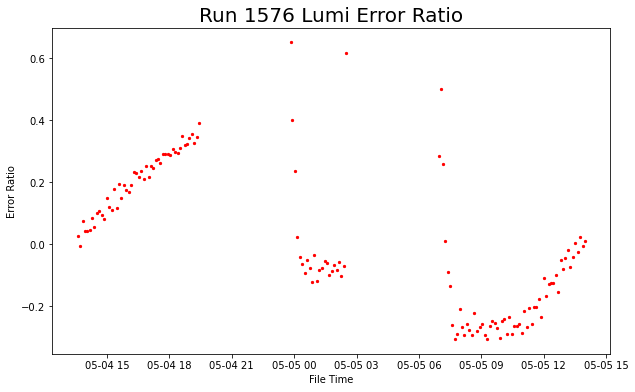

In [227]:
#plot ratio of error to mqLumi
plt.figure(figsize=(10, 6))
plt.xlabel('File Time')
plt.ylabel('Error Ratio')
plt.title("Run {} Lumi Error Ratio".format(run), fontsize=20)
plt.scatter(new['start_time'], new['errorRatio'], marker='o', linestyle='-', color='red', s=5)

In [226]:
new['errorRatio'].to_list()

[0.026607272176473868,
 -0.005566069361400764,
 0.07414814013072286,
 0.042519497081317845,
 0.04146542781111587,
 0.04526017982009347,
 0.08284175178698643,
 0.05572836318995812,
 0.0993009821946351,
 0.10761477003562626,
 0.09259531490881928,
 0.08089142519838435,
 0.14991211038104996,
 0.11884047440987672,
 0.10910869515790654,
 0.17748005679824921,
 0.1169428736840335,
 0.19405239495886442,
 0.14876741610027414,
 0.18977334773907456,
 0.17334265672570615,
 0.16791975090222563,
 0.1925420328147009,
 0.23402885200752124,
 0.23019185401781514,
 0.21633205922113208,
 0.23574925147163797,
 0.21069149974979595,
 0.2530420534604723,
 0.21562415276933944,
 0.25238936888780655,
 0.24710129694511546,
 0.2707261264353735,
 0.2746189771146498,
 0.26316848523838915,
 0.29272041441020186,
 0.29150192535632397,
 0.29030732487233357,
 0.2887901165437031,
 0.30787345838790775,
 0.29738370505692063,
 0.2948061198193146,
 0.31148021395380837,
 0.34909166230505584,
 0.3204868444260431,
 0.322666139095

In [214]:
#compare total run luminosities

sumOMS = new['delivered_lumi'].sum()
sumMQ = new['lumiEst'].sum()

print("OMS Lumi {}, milliqan lumi {}".format(sumOMS, sumMQ))


OMS Lumi 941.641175891643, milliqan lumi 941.6346592088


In [219]:
new[(new['lumiEst'] > 0) & (new['delivered_lumi'] == 0)]

,lumiEst,start,stop,start_time,end_time,delivered_lumi,start_diff,stop_diff,error,errorRatio


In [220]:
new[(new['lumiEst'] == 0) & (new['delivered_lumi'] > 0)]

,lumiEst,start,stop,start_time,end_time,delivered_lumi,start_diff,stop_diff,error,errorRatio


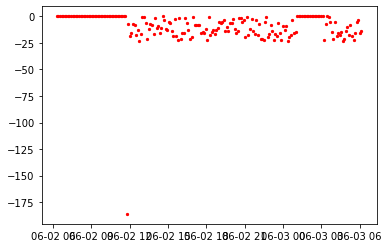

In [160]:
plt.scatter(new['start_time'], new['start_diff'],  marker='o', linestyle='-', color='red', s=5)